# 乱数を使って保持器を作る

In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(0)
params = np.random.randn(100, 10) / 3
params[params<-1] = -1
params[params>1] = 1
params[:2]

array([[ 0.58801745,  0.13338574,  0.32624599,  0.7469644 ,  0.62251933,
        -0.32575929,  0.31669614, -0.0504524 , -0.03440628,  0.13686617],
       [ 0.04801452,  0.48475784,  0.25367924,  0.04055834,  0.14795441,
         0.11122478,  0.49802636, -0.06838609,  0.1043559 , -0.28469858]])

In [3]:
params.max(), params.min()

(0.919785038007194, -1.0)

In [4]:
r0 = lambda dr: 2.35e-3 + dr
r1 = lambda dr: 2.85e-3 + dr

r0(0.25e-3), r1(-0.25e-3)

(0.0026, 0.0026)

In [5]:
r0s = r0(params[:, 0] * 0.2e-3)
r1s = r1(params[:, 1] * 0.2e-3)
drs = r1s - r0s

drs.min() * 1e3, drs.max() * 1e3, r0s.min() * 1e3, r1s.max() * 1e3


(0.2846060161200868,
 0.7137738940849623,
 2.1778135578020037,
 2.9786354702544657)

In [6]:
h0 = lambda dh: 0.93e-3 + dh
h1 = lambda dh: 2.10e-3 + dh

h0s = h0(params[:, 2] * 0.2e-3)
h1s = h1(params[:, 3] * 0.2e-3)

h0s.max() * 1e3, h0s.min() * 1e3, h1s.max() * 1e3, h1s.min() * 1e3

(1.0835944465122629,
 0.7796290513731874,
 2.2839570076014386,
 1.9517731231850382)

In [7]:
bevel = lambda r: 0.1 * drs * r

bevels = bevel(params[:, 4]+2)

(bevels / drs).max(), (bevels / drs).min()

(0.2898741350854526, 0.11136092540010864)

In [8]:
pocket_r = lambda dr: 0.825e-3 + dr

pocket_rs = pocket_r(params[:, 5] * 1e-6)
pocket_rs.min() * 1e3, pocket_rs.max() * 1e3

(0.8240551484982418, 0.8258041512265145)

In [9]:
neck_x = lambda dx: 1.70e-3 + dx

neck_xs = neck_x(params[:, 6] * 20e-6)
neck_xs.min() * 1e3, neck_xs.max() * 1e3

(1.6842388412190585, 1.7141119401432245)

In [10]:
neck_r = lambda dr: 1.20e-3 + dr

neck_rs = neck_r(params[:, 7] * 20e-6)
neck_rs.min() * 1e3, neck_rs.max() * 1e3


(1.1817354855520694, 1.2150448233153213)

In [11]:
neck_h = lambda dh: 2.45e-3 + dh

neck_hs = neck_h(params[:, 8] * 100e-6)
neck_hs.min() * 1e3, neck_hs.max() * 1e3


(2.37101376982578, 2.5364808195922715)

In [12]:
neck_dh = lambda r: (neck_hs - h1s) * r * 0.1

neck_dhs = neck_dh(params[:, 9]+2)
neck_dhs.min() * 1e3, neck_dhs.max() * 1e3


(0.028458986531231186, 0.12664880375765164)

In [13]:
df = pd.DataFrame({
    'r0': r0s,
    'r1': r1s,
    'h0': h0s,
    'h1': h1s,
    'bevel': bevels,
    'pocket_r': pocket_rs,
    'neck_x': neck_xs,
    'neck_r': neck_rs,
    'neck_h': neck_hs,
    'neck_dh': neck_dhs
})

df.to_csv('../data/random/random_params.csv', index=False)


In [14]:
# cargo run --release "data/Tetra.vtu,data/face_and_edge_index.xml,data/Tetra_linspace.vtu" "2.345e-3,2.850e-3,0.93e-3,2.10e-3,0.10e-3,0.825e-3,1.70e-3,1.20e-3,2.45e-3,0.152e-3" "100"

command_args0 = lambda i: f"\"data/Tetra.vtu,data/face_and_edge_index.xml,data/random/Tetra_linspace{i}.vtu\" "
command_args0(0)


'"data/Tetra.vtu,data/face_and_edge_index.xml,data/random/Tetra_linspace0.vtu" '

In [15]:
command_args1 = lambda i: f'\"{r0s[i]},{r1s[i]},{h0s[i]},{h1s[i]},{bevels[i]},{pocket_rs[i]},{neck_xs[i]},{neck_rs[i]},{neck_hs[i]},{neck_dhs[i]}\" \"1000\"'
command_args1(10)

# '../data/Tetra_linspace10.vtu 0.0024755433798037503 0.002760149395923837 0.0008453010001009512 0.002164626447210534 4.579193726579163e-05 0.0008256478737285498 0.0016972425401282683 0.0011950169679237283 0.002514098067549346 0.0001742818416754026 1000'

'"0.0024755433798037503,0.002760149395923837,0.0008453010001009512,0.002164626447210534,4.579193726579163e-05,0.0008256478737285498,0.0016972425401282683,0.0011950169679237283,0.002514098067549346,8.71409208377013e-05" "1000"'

In [16]:
import subprocess

command = "cd ../; cargo run --release "
result = subprocess.run(command + command_args0(10) + command_args1(10), shell=True)


    Finished release [optimized] target(s) in 0.24s
     Running `target/release/mophing data/Tetra.vtu,data/face_and_edge_index.xml,data/random/Tetra_linspace10.vtu 0.0024755433798037503,0.002760149395923837,0.0008453010001009512,0.002164626447210534,4.579193726579163e-05,0.0008256478737285498,0.0016972425401282683,0.0011950169679237283,0.002514098067549346,8.71409208377013e-05 1000`


[["data/Tetra.vtu", "data/face_and_edge_index.xml", "data/random/Tetra_linspace10.vtu"], ["0.0024755433798037503", "0.002760149395923837", "0.0008453010001009512", "0.002164626447210534", "4.579193726579163e-05", "0.0008256478737285498", "0.0016972425401282683", "0.0011950169679237283", "0.002514098067549346", "8.71409208377013e-05"], ["1000"]]
iteration: 1, quality: 0.010937042
iteration: 2, quality: 0.0065268707
iteration: 4, quality: 0.0032315673
iteration: 8, quality: 0.001217883
iteration: 16, quality: 0.0002577934
iteration: 32, quality: 2.4710514e-5
iteration: 64, quality: 1.2650395e-6
iteration: 128, quality: 5.3103466e-10
iteration: 1, quality: 0.028009864
iteration: 2, quality: 0.0149004115
iteration: 4, quality: 0.006564352
iteration: 8, quality: 0.0019724276
iteration: 16, quality: 0.0003320252
iteration: 32, quality: 2.5860802e-5
iteration: 64, quality: 4.788802e-7
iteration: 128, quality: 0.0
The new file has been created: data/random/Tetra_linspace10.vtu


In [37]:
output_span = 10

for i in range(len(params)):
    subprocess.run(command + command_args0(i) + command_args1(i), shell=True, capture_output=True, text=True)
    
    if i % output_span == 0:
        print(f"Done {i}")


Done 0
Done 10
Done 20
Done 30
Done 40
Done 50
Done 60
Done 70
Done 80
Done 90


## 体積が負のメッシュを可視化



In [47]:
import numpy as np
from matplotlib import pyplot as plt
import pyvista as pv


In [48]:
# ファイル名を指定してデータを読み込む
full_mesh = pv.read('../data/Tetra_linspace.vtu')
# full_mesh = pv.read('../data/random/Tetra_linspace1.vtu')
full_points = np.array(full_mesh.points.tolist()) 
full_points.shape


(7431, 3)

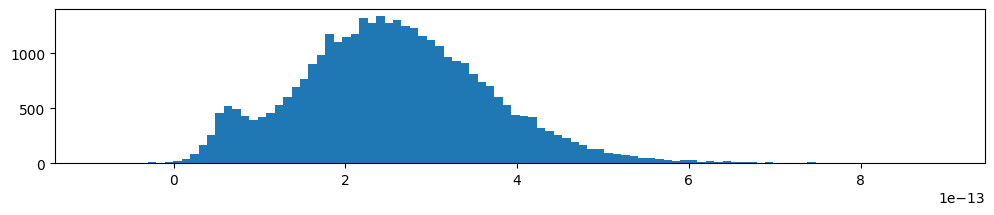

In [49]:
def calculate_volume(mesh):
    # Get the cells from the mesh
    cells = mesh.cells.reshape(-1, 5)[:, 1:]

    # Calculate the volume of each tetrahedron
    volumes = np.zeros(len(cells))
    # for cell in cells:
    for i in range(len(cells)):
        cell = cells[i]
        # Get the points of the tetrahedron
        points = np.array(mesh.points[cell])

        # Calculate the vectors formed by the points
        vectors = points[1:] - points[0]

        # Calculate the volume using the cross product
        volumes[i] = (np.dot(vectors[0], np.cross(vectors[1], vectors[2]))) / 6

    return volumes

volumes = calculate_volume(full_mesh)

plt.figure(figsize=(12, 2))
plt.hist(volumes, bins=100)
plt.show()


In [50]:
minus_volume_tetra = np.where(np.array(volumes) < 0)[0]
cells0 = np.array(full_mesh.cells.tolist()).reshape(-1, 5)[:, 1:]

cells0.shape, minus_volume_tetra.shape, minus_volume_tetra.max()


((35054, 4), (34,), 33167)

In [51]:
minus_volume_index = cells0[minus_volume_tetra].flatten()
minus_volume_index = np.unique(minus_volume_index)

full_points = np.array(full_mesh.points.tolist())
minus_points = full_points[minus_volume_index]
minus_points.shape


(133, 3)

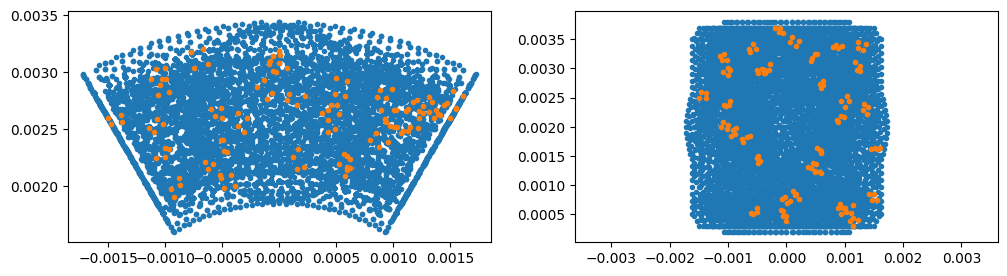

In [52]:
fig,ax = plt.subplots(1, 2, figsize=(12, 3))

for i in [0,1]:
    ax[i].plot(full_points[:,0], full_points[:,1+i], '.')
    ax[i].plot(minus_points[:,0], minus_points[:,1+i], '.')
    ax[i].axis('equal')
plt.show()

In [53]:
minus_volume0 = calculate_volume(full_mesh) < 0
minus_volume0.sum()


34

## 以下のアルゴリズムはエッジを反転させる結果，STARでエラーになります．実行しないでください．

In [54]:
# def flip_cells(mesh, cells_to_flip):
#     # Get the cells from the mesh
#     cells = np.array(mesh.cells.tolist()).reshape(-1, 5)

#     # Flip the cells
#     for cell in cells_to_flip:
#         # Get the points of the tetrahedron
#         points = cells[cell]

#         # Reverse the order of the points
#         cells[cell] = points[[0, 1, 3, 2, 4]]

#     # Update the cells of the mesh
#     mesh.cells = cells.reshape(-1, 1)

#     return mesh

# full_mesh = flip_cells(full_mesh, minus_volume_tetra)
# minus_volume0 = calculate_volume(full_mesh) < 0
# minus_volume0.sum()

In [55]:
# output_span = 10

# for i in range(100):
#     full_mesh = pv.read(f'../data/random/Tetra_linspace{i}.vtu')
#     volumes = calculate_volume(full_mesh)
#     minus_volume_tetra = np.where(np.array(volumes) < 0)[0]

#     if i % output_span == 0:
#         print(f"itaration {i}, minus_volume_tetra: {minus_volume_tetra.shape}")

#     full_mesh = flip_cells(full_mesh, minus_volume_tetra)
#     volumes = calculate_volume(full_mesh)

#     # pv.save_meshio(f'../data/random/Tetra_linspace{i}.vtu', full_mesh, binary=False)
#     pv.save_meshio(f'../data/random/Tetra_linspace{i}.vtu', full_mesh, binary=True)
    